In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
import geopandas as gpd
plt.style.use('classic')

trees = pd.read_csv("oahu_trees.csv")

In [2]:
trees

,Latitude,Longitude,Name,Species Code,Scientific Name,Common Name,Height (ft),Diameter (in),Gross Carbon Sequestered (lb/yr),O2 Produced (lb/yr_,...,Flag,TMK,Trunk Circumference,City,Old ID,Variety Name,Hawaiian Name,Geometry Point,Dead Tree Location,Object ID
0,21.49,-158.06,"20,140,001",BDL OTHER,Acrocarpus fraxinifolius,Pink Cedar,117,89,NaN,NaN,...,NaN,77001001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,21.31,-157.85,"20,140,003",ADDI3,Adansonia digitata,Baobab,54.5,147.9,22,58.8,...,NaN,21035003,38.7,NL,NaN,NaN,NaN,NaN,NaN,2
2,21.32,-157.86,"20,140,002",ADDI3,Adansonia digitata,Baobab,66,162.8,22,58.8,...,TMK polygon only half of botanical garden...mu...,17007002,42.6,NaN,NaN,NaN,NaN,NaN,NaN,1
3,21.29,-157.85,"20,140,004",ADDI3,Adansonia digitata,Baobab,32.5-36,52-112,29.90-85.40,79.80-227.80,...,NaN,23037001,13.7-29.4,NaN,NaN,NaN,NaN,NaN,NaN,3
4,21.31,-157.86,"20,140,015",AGRO,Agathis robusta,Queensland Kauri,62,63.1,41.3,110.2,...,NaN,21025003,16.5,NL,NaN,NaN,NaN,NaN,NaN,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,21.30,-157.85,"20,141,236",FIBE2,Ficus benghalensis,Indian Banyan,60,95.5,25.7,68.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1290
335,21.30,-157.85,"20,141,238",FIBE2,Ficus benghalensis,Indian Banyan,60,57,54.2,144.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1292
336,21.30,-157.85,"20,141,239",FIBE2,Ficus benghalensis,Indian Banyan,60,76,26.2,69.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1293
337,21.30,-157.82,NaN,ADDI3,Adansonia digitata,Baobab,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1294


### Cleaning Data ###

In [3]:
# Checking Missing Data
for column in trees:
    print(str(column))
    print(trees[column].isnull().value_counts())
    print()

Latitude
False    339
Name: Latitude, dtype: int64

Longitude
False    339
Name: Longitude, dtype: int64

Name
False    338
True       1
Name: Name, dtype: int64

Species Code
False    339
Name: Species Code, dtype: int64

Scientific Name
False    339
Name: Scientific Name, dtype: int64

Common Name
False    339
Name: Common Name, dtype: int64

Height (ft)
False    293
True      46
Name: Height (ft), dtype: int64

Diameter (in)
False    279
True      60
Name: Diameter (in), dtype: int64

Gross Carbon Sequestered (lb/yr)
False    268
True      71
Name: Gross Carbon Sequestered (lb/yr), dtype: int64

O2 Produced (lb/yr_
False    268
True      71
Name: O2 Produced (lb/yr_, dtype: int64

Storm Water Avoided (gal/yr)
False    266
True      73
Name: Storm Water Avoided (gal/yr), dtype: int64

Storm Water Intercepted (gal/yr_
False    268
True      71
Name: Storm Water Intercepted (gal/yr_, dtype: int64

Date Assessed
True     241
False     98
Name: Date Assessed, dtype: int64

Crown Spread L

In [4]:
# Removes columns with large amount of null values
trees.drop(["Dead Tree Location",
           "Geometry Point",
           "Hawaiian Name",
           "Variety Name",
           "Old ID",
           "City",
           "Owner Address",
           "Owner Name",
           "Description",
           "Flag",
           "Location Address",
           "Accessibility",
           "Trunk Circumference",
           "Live Crown Ration",
           "Crown Spread L (ft)",
           "Crown Spread S (ft)"], axis=1, inplace=True)

In [5]:
# Columns to remove due to irrelevance:
"""
- Additional Information
- Location Description
- Military Base
- TMK
- Object ID
- Date Assessed
"""
trees.drop(["Additional Information",
           "Location Description",
           "Military Base",
           "TMK",
           "Object ID",
           "Date Assessed"], axis=1, inplace=True)


In [6]:
# Changes column names to lower case and replaces " " with "_"
old_columns = trees.columns.to_list()
new_columns = []

for item in old_columns:
    new_columns.append(item.lower().replace(" ","_").replace(")","").replace("(", ""))
    
trees.columns = new_columns

In [7]:
# Fixes some typos in column names
trees.columns
trees.rename(columns = {"o2_produced_lb/yr_":"o2_produced_lb/yr", 
              "storm_water_intercepted_gal/yr_":"storm_water_intercepted_gal/yr"},
            inplace=True)

In [8]:
# Second check of missing values
for column in trees:
    print(str(column))
    print(trees[column].isnull().value_counts())
    print()

latitude
False    339
Name: latitude, dtype: int64

longitude
False    339
Name: longitude, dtype: int64

name
False    338
True       1
Name: name, dtype: int64

species_code
False    339
Name: species_code, dtype: int64

scientific_name
False    339
Name: scientific_name, dtype: int64

common_name
False    339
Name: common_name, dtype: int64

height_ft
False    293
True      46
Name: height_ft, dtype: int64

diameter_in
False    279
True      60
Name: diameter_in, dtype: int64

gross_carbon_sequestered_lb/yr
False    268
True      71
Name: gross_carbon_sequestered_lb/yr, dtype: int64

o2_produced_lb/yr
False    268
True      71
Name: o2_produced_lb/yr, dtype: int64

storm_water_avoided_gal/yr
False    266
True      73
Name: storm_water_avoided_gal/yr, dtype: int64

storm_water_intercepted_gal/yr
False    268
True      71
Name: storm_water_intercepted_gal/yr, dtype: int64

tree_condition
False    302
True      37
Name: tree_condition, dtype: int64

land_use
False    338
True       1
N

In [9]:
# Compare columns with highest amount of missing data to identify potential rows to drop
trees["nan_total"] = trees.isnull().sum(axis=1)

# Removes all rows with 3+ missing values
trees = trees[trees["nan_total"] < 3]
trees

,latitude,longitude,name,species_code,scientific_name,common_name,height_ft,diameter_in,gross_carbon_sequestered_lb/yr,o2_produced_lb/yr,storm_water_avoided_gal/yr,storm_water_intercepted_gal/yr,tree_condition,land_use,number,island,nan_total
1,21.31,-157.85,"20,140,003",ADDI3,Adansonia digitata,Baobab,54.5,147.9,22,58.8,220.6,1370.88,Good,L,1,O,0
2,21.32,-157.86,"20,140,002",ADDI3,Adansonia digitata,Baobab,66,162.8,22,58.8,220.6,1370.88,Good,P,1,O,0
3,21.29,-157.85,"20,140,004",ADDI3,Adansonia digitata,Baobab,32.5-36,52-112,29.90-85.40,79.80-227.80,199.51-204.44,"1,270.49-1,239.82",Good,P,Grove [11],O,0
4,21.31,-157.86,"20,140,015",AGRO,Agathis robusta,Queensland Kauri,62,63.1,41.3,110.2,208.48,"1,295.93",Good,I,1,O,0
6,21.48,-158.05,"20,140,017",AL1,Albizia guachapele,Guachapele,57,61,44.7,119.3,219.7,"1,365.49",Excellent,I,1 of 3,O,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,21.29,-157.84,"20,141,220",FI1,Ficus sp.,Banyan,58,221.5,22,58.8,232.57,"1,445.54",Good,P,1,O,0
334,21.30,-157.85,"20,141,236",FIBE2,Ficus benghalensis,Indian Banyan,60,95.5,25.7,68.6,232.57,"1,445.54",Good,P,1,O,0
335,21.30,-157.85,"20,141,238",FIBE2,Ficus benghalensis,Indian Banyan,60,57,54.2,144.5,231.37,"1,438.06",Good,P,1,O,0
336,21.30,-157.85,"20,141,239",FIBE2,Ficus benghalensis,Indian Banyan,60,76,26.2,69.9,232.57,"1,445.54",Fair,P,1,O,0


In [11]:
# Check remaining rows with missing data
missing_data = trees[trees["nan_total"] > 0]
missing_data

,latitude,longitude,name,species_code,scientific_name,common_name,height_ft,diameter_in,gross_carbon_sequestered_lb/yr,o2_produced_lb/yr,storm_water_avoided_gal/yr,storm_water_intercepted_gal/yr,tree_condition,land_use,number,island,nan_total
45,21.27,-157.82,"20,140,104",CAEQ,Casuarina equisetifolia,Ironwood,52-85,25.5-41.5,47.50-96.30,126.70-256.70,496.78-801.01,"3,087.58-4,978.59",NaN,P,Grove,O,1
63,21.28,-157.83,"20,140,377",FIBE2,Ficus benghalensis,Indian Banyan,75,573,"3,733.00","9,349.00",NaN,"23,850.00",Excellent,LC,1,O,1
86,21.49,-158.03,"20,140,491",FRAM,Fraxinus americana,White Ash,56-65,36.5-44,197.40-255.00,526.50-680.00,316.13-317.47,"1,964.83-1,973.29",NaN,I,Grove [79],O,1
136,21.49,-158.03,"20,140,707",RORE,Roystonea regia,Royal Palm,52-64,20.5-24,2.70-3.90,7.10-10.50,56.85-62.91,353.53-391.08,NaN,I,Grove [91],O,1
175,20.89,-156.51,"20,140,947",HYCO,Hymenaea courbaril,West Indian Locust,75,39,208.1,554.9,220.6,"1,370.88",NaN,I,1,M,1
176,20.87,-156.67,"20,140,954",WARO,Washingtonia robusta,Mexican Fan Palm,55,16,3,7.9,50.94,316.65,NaN,I,1,M,1
177,20.87,-156.67,"20,140,952",ALSA,Albizia saman,Monkeypod,60,69,34.5,92,219.7,"1,365.49",NaN,I,1,M,1
181,20.87,-156.67,"20,140,955",RORE,Roystonea regia,Royal Palm,50,22,2.5,6.6,59.84,372.08,NaN,I,1,M,1
182,20.87,-156.67,"20,140,953",WAFI,Washingtonia filifera,California Featherduster Palm,40,23,1.6,4.3,61.86,384.72,NaN,I,1,M,1
191,20.78,-156.32,"20,141,070",SCMO,Schinus molle,California Pepper Tree,50,53,83.8,223.4,17.88,111.09,NaN,S,1,M,1


In [13]:
# Fill null values in tree_condition with unknown and removes all other rows with missing values
trees.iloc[:,12].fillna("unknown", inplace=True)
trees = trees[trees["nan_total"] == 0]

# Drops nan_total column, as we are finished with it
trees = trees.drop("nan_total", axis=1)

# Resets index of dataset
trees.reset_index(inplace=True)
trees.drop("index", axis=1, inplace=True)

In [15]:
# Checks dtypes of data columns
trees.dtypes

latitude                          float64
longitude                         float64
name                               object
species_code                       object
scientific_name                    object
common_name                        object
height_ft                          object
diameter_in                        object
gross_carbon_sequestered_lb/yr     object
o2_produced_lb/yr                  object
storm_water_avoided_gal/yr         object
storm_water_intercepted_gal/yr     object
tree_condition                     object
land_use                           object
number                             object
island                             object
dtype: object

In [16]:
# Check "number" column to identify groups that need removing
trees.number.value_counts()

1              190
2 of 2           7
1 of 2           6
Grove            5
2 of 3           3
Grove [11]       3
1 of 3           3
3 of 3           3
Grove [25]       2
Grove [5]        2
Grove [23]       2
6 of 6           1
Grove [85]       1
18               1
Grove [20]       1
Grove [14]       1
Grove [19]       1
Grove [42]       1
Grove [3]        1
5                1
Grove [16]       1
3 of 6           1
Grove [41]       1
4 of 6           1
1 of 6           1
5 of 6           1
2 of 6           1
58               1
Grove [56]       1
Grove [110]      1
Grove [57]       1
Grove [33]       1
4 of 4           1
2 of 4           1
1 of 4           1
7                1
Name: number, dtype: int64

In [17]:
# Removes all trees marked as "grove", as the ranges 
# in their value sets are causing issues parsing numerical data

trees = trees[trees["number"].str.contains("Grove")==False]
trees = trees[(trees["number"].str.contains("of")) +
             (trees["number"] == "1")]

trees.number.value_counts()


1         190
2 of 2      7
1 of 2      6
1 of 3      3
3 of 3      3
2 of 3      3
1 of 4      1
2 of 4      1
4 of 4      1
2 of 6      1
5 of 6      1
1 of 6      1
4 of 6      1
6 of 6      1
3 of 6      1
Name: number, dtype: int64

In [18]:
# Drops "number" column, as this is no longer needed as all remaining samples are for single trees

trees.drop("number", axis=1, inplace=True)

In [19]:
# This cell counts numerical values containing a hyphen. Luckily there are only 4, so we can remove them all
objects = ["latitude", "longitude", "name", "species_code", "scientific_name", "common_name",
          "tree_condition", "land_use", "number", "island"]

for column in trees:
    if column not in objects:
        hyphen = trees[trees[column].str.contains("-")].count()
        print(hyphen[column])
        
trees[trees["height_ft"].str.contains("-")]

4
4
4
4
3
3


,latitude,longitude,name,species_code,scientific_name,common_name,height_ft,diameter_in,gross_carbon_sequestered_lb/yr,o2_produced_lb/yr,storm_water_avoided_gal/yr,storm_water_intercepted_gal/yr,tree_condition,land_use,island
97,21.34,-157.81,"20,140,673",RO9,Roystonea oleracea,Caribbean Royal Palm,111-116,25.8-26.2,11.30-12.30,30.10-32.70,66.05,410.53,Excellent,P,O
167,21.96,-159.37,"20,141,102",TEGR,Tectona grandis,Teak,22-28,12.6-18.7,30.50-53.50,81.20-142.80,72.71-109.14,451.75-678.18,Fair,P,K
169,19.72,-155.08,"20,141,111",CONU,Cocos nucifera,Coconut,30-76,12-14',0.9-5.4,2.4-14.3,223.14-262.94,36.21-42.64,Good,P,B
185,21.10,-157.04,"20,141,146",CONU,Cocos nucifera,Coconut Palm,31-92.5,11.8-15.7,1.20-10.00,3.20-26.50,36.80-49.60,228.68-308.42,Fair-Excellent,V,Moloka`i


In [20]:
# Drops hyphenated rows and removes "," from numbers
trees.drop([97,167,169,185], inplace=True)

for column in trees:
    if column not in objects:
        trees[column] = trees[column].str.replace(",","")

In [21]:
# Changes the dtype of numerical columns to be correct
objects = ["latitude", "longitude", "name", "species_code", "scientific_name", "common_name",
          "tree_condition", "land_use", "number", "island"]

for column in trees:
    if str(column) not in objects:
        trees[column] = pd.to_numeric(trees[column])

In [22]:
# Changes all string values to lower case
ignore = ["latitude", "longitude"]
for column in trees:
    if str(column) in objects and str(column) not in ignore:
        trees[column] = trees[column].str.lower()

In [23]:
# Prints out unique values for scientific name, common name and island for me to check for duplicates/typos
print(sorted(trees.common_name.unique()))
print()
print(sorted(trees.scientific_name.unique()))
print()
print(sorted(trees.island.unique()))

["'ala'a", "'ohe", "'ohe makai", "'ohi'a lehua", 'alani', 'albizia', 'banyan', 'baobab', 'blue mexican fig', 'bodhi/peepul tree', 'breadfruit', 'bunya-bunya', 'cabbage palm', 'cannonball tree', 'capparis', 'chebulic myrobalan', 'chicle', 'chinese banyan', 'divi-divi', 'earpod', 'false kamani', 'false olive', 'geometry tree', 'guachapele', 'guana', 'hame', 'ho`awa', 'hog plum', 'hoop pine', 'hutu', 'indian banyan', 'indian gooseberry', 'indian rubber', 'ironwood', 'jack-in-the-box tree', 'kamani', 'kapok', 'kiawe', "king kalakaua's durian", 'koa', "kopiko 'ula", 'kou', 'litchi', 'loulu', 'loulu palm', 'macadamia nut', 'mahogany', 'mammee apple', 'mango', 'mindanao gum', 'monkeypod', 'moreton bay fig', 'mountain apple', 'mysore fig', 'narra', 'norfolk pine', 'ohi`a lehua', 'olive tree', 'panama tree', 'pili nut', 'pink bombax', 'podocarpus', 'pua kenikeni', "queen's crape myrtle", 'queensland kauri', 'rainbow shower', 'red cassia', 'royal caribbean palm', 'sandbox tree', 'siris', 'skunk 

In [24]:
# Having done some secondary research, I can see that the value in the "island" field can be 
# merged into just 6, with oahu/o and moloka'i/mo referring to the same islands
# I will also replace the letters with the full name of the islands

trees["island"] = trees["island"].replace("mo", "moloka`i").replace("o", "oahu")


# I will also replace the letters with the full name of the islands

trees["island"] = trees["island"].replace("b", "hawai`i").replace("m", "mau`i").replace("k","kaua`i")

# Visualisations #

In [25]:
trees.columns

Index(['latitude', 'longitude', 'name', 'species_code', 'scientific_name',
       'common_name', 'height_ft', 'diameter_in',
       'gross_carbon_sequestered_lb/yr', 'o2_produced_lb/yr',
       'storm_water_avoided_gal/yr', 'storm_water_intercepted_gal/yr',
       'tree_condition', 'land_use', 'island'],
      dtype='object')

Text(0.5, 1.0, 'Trees by Island')

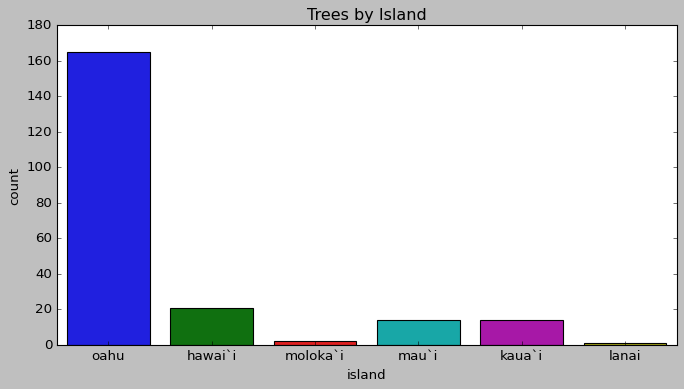

In [26]:
plt.figure(figsize=[10,5])
sns.countplot(data=trees, x="island")
plt.title("Trees by Island")

Text(0.5, 1.0, 'Count of Most Common Trees')

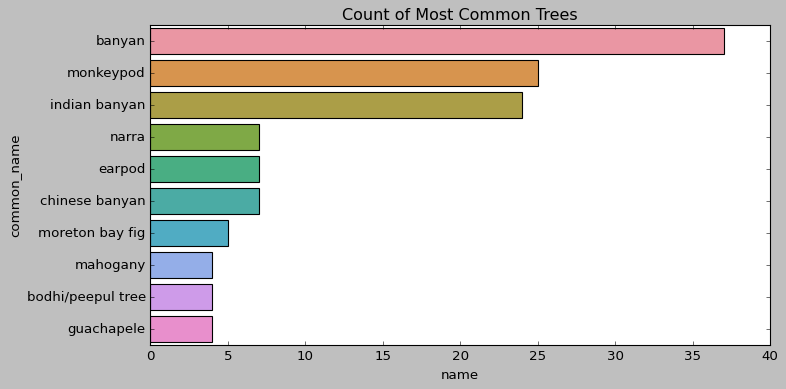

In [27]:
all_types = trees.groupby(by="common_name").name.count()
all_types = pd.DataFrame(all_types).reset_index().sort_values(by="name", ascending=False)
common_types = all_types.head(10)
common_list = common_types.common_name.unique()
common_types_df = trees[trees["common_name"].isin(common_list)].reset_index(drop=True)

plt.figure(figsize=[10,5])
sns.barplot(data=common_types, x="name", y="common_name")
plt.title("Count of Most Common Trees")

In [28]:
common_types_df.shape

(124, 15)

Text(0.5, 1.0, 'Tree Heights')

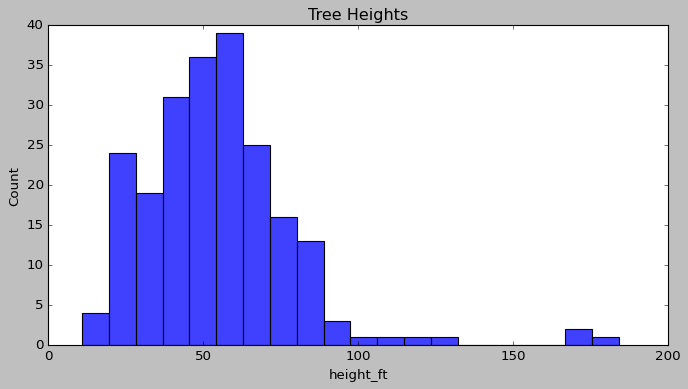

In [29]:
plt.figure(figsize=[10,5])
sns.histplot(data=trees, x="height_ft")
plt.title("Tree Heights")

Text(0.5, 1.0, 'Tree Diameters')

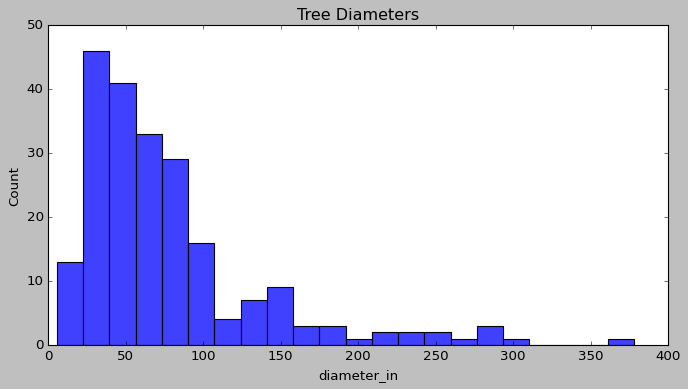

In [30]:
plt.figure(figsize=[10,5])
sns.histplot(data=trees, x="diameter_in")
plt.title("Tree Diameters")

Text(0.5, 1.0, 'Diameter vs. Gross Carbon Sequestered')

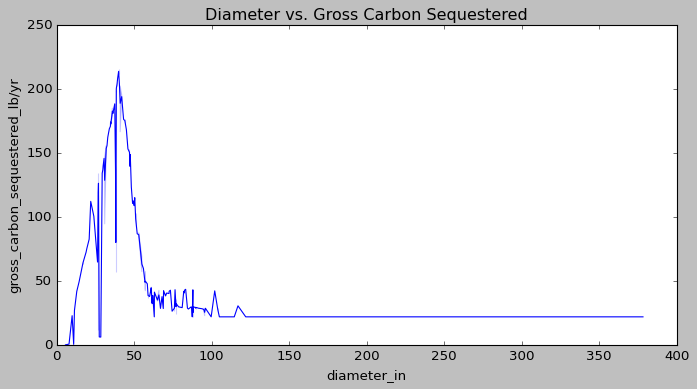

In [31]:
plt.figure(figsize=[10,5])
sns.lineplot(data=trees, x="diameter_in", y="gross_carbon_sequestered_lb/yr")
plt.title("Diameter vs. Gross Carbon Sequestered")

Text(0.5, 1.0, 'Height vs. Gross Carbon Sequestered')

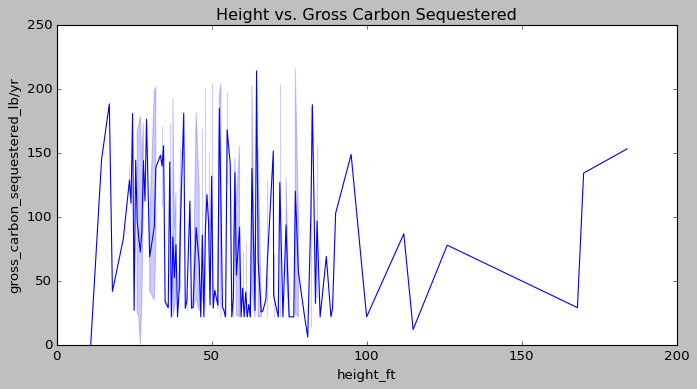

In [32]:
plt.figure(figsize=[10,5])
sns.lineplot(data=trees, x="height_ft", y="gross_carbon_sequestered_lb/yr")
plt.title("Height vs. Gross Carbon Sequestered")

Text(0.5, 1.0, 'Storm Water Avoided vs. Intercepted')

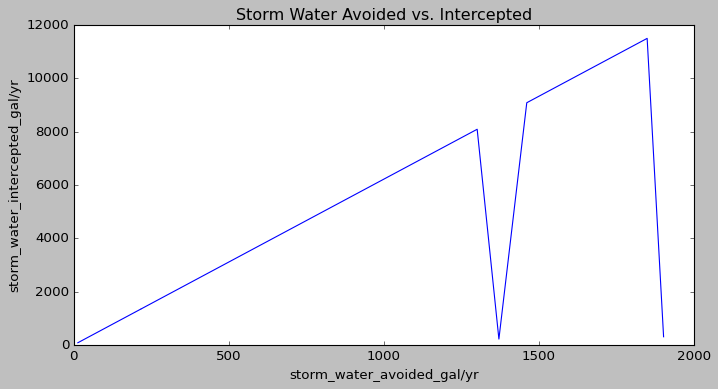

In [33]:
plt.figure(figsize=[10,5])
sns.lineplot(data=trees, x="storm_water_avoided_gal/yr", y="storm_water_intercepted_gal/yr")
plt.title("Storm Water Avoided vs. Intercepted")

In [34]:
storm_water_outliers = trees[(trees["storm_water_avoided_gal/yr"] > 1000) &
                            (trees["storm_water_intercepted_gal/yr"] < 2000)]
storm_water_outliers

,latitude,longitude,name,species_code,scientific_name,common_name,height_ft,diameter_in,gross_carbon_sequestered_lb/yr,o2_produced_lb/yr,storm_water_avoided_gal/yr,storm_water_intercepted_gal/yr,tree_condition,land_use,island
42,21.31,-157.86,"20,140,374",fibe2,ficus benghalensis,indian banyan,72.0,63.00,22.0,58.8,1371.85,222.47,excellent,i,oahu
75,21.33,-157.84,"20,140,584",lich4,litchi chinensis,litchi,39.5,83.25,43.5,116.1,1903.12,308.65,good,s,oahu


Text(0.5, 1.0, 'O2 Produced vs. Gross Carbon Sequestered')

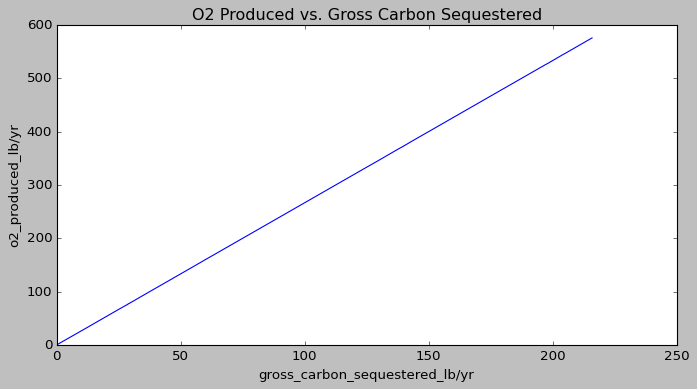

In [35]:
plt.figure(figsize=[10,5])
sns.lineplot(data=trees, x="gross_carbon_sequestered_lb/yr", y="o2_produced_lb/yr")
plt.title("O2 Produced vs. Gross Carbon Sequestered")

Text(0.5, 1.0, 'Height vs. Diamter')

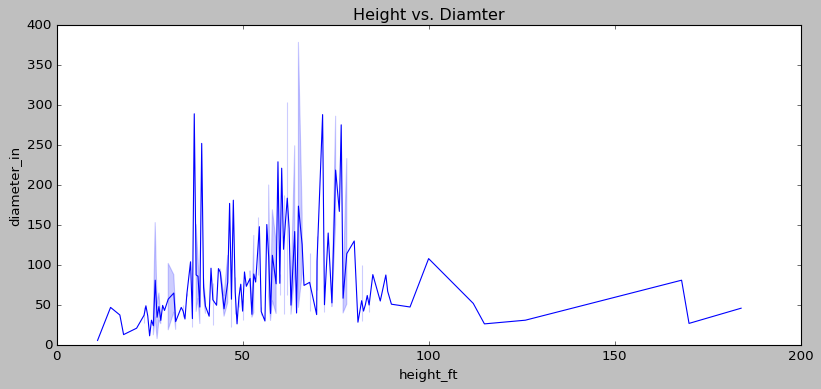

In [36]:
plt.figure(figsize=[12,5])
sns.lineplot(data=trees, x="height_ft", y="diameter_in")
plt.title("Height vs. Diamter")

Text(0.5, 1.0, 'Height vs. Diamter (No Banyans)')

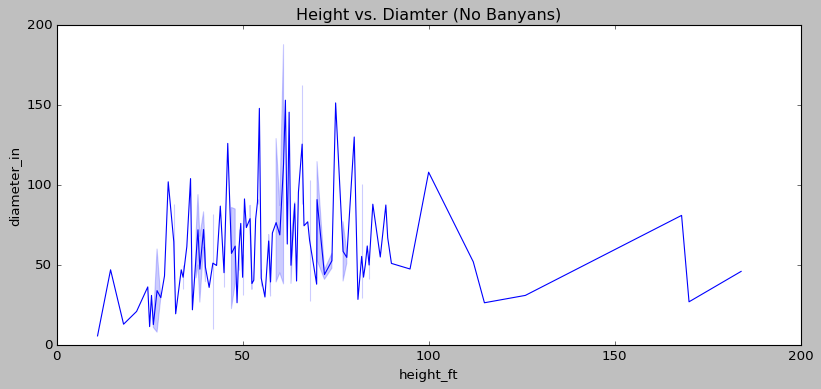

In [37]:
no_banyan = trees[trees["common_name"].str.contains("banyan") == False]

plt.figure(figsize=[12,5])
sns.lineplot(data=no_banyan, x="height_ft", y="diameter_in")
plt.title("Height vs. Diamter (No Banyans)")

Text(0.5, 1.0, 'Dimensions of Common Trees')

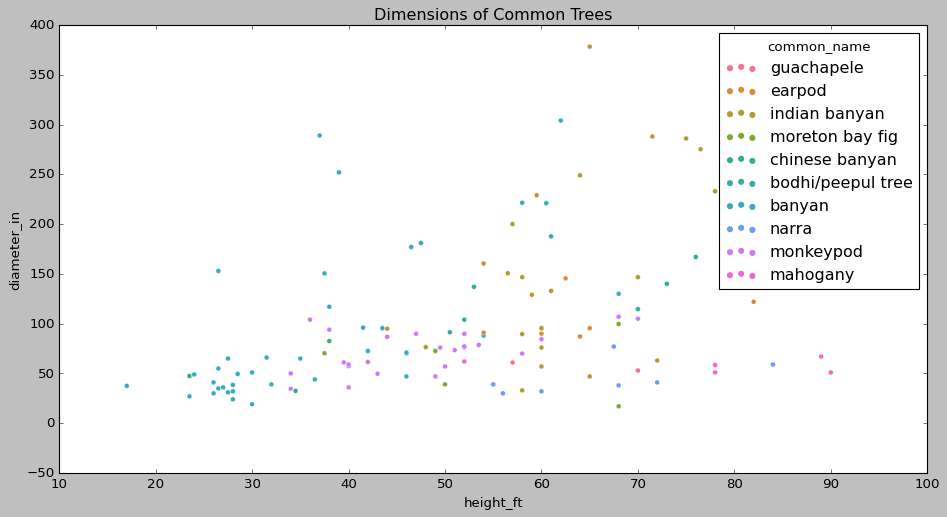

In [38]:
plt.figure(figsize=[14,7])
sns.scatterplot(data=common_types_df, x="height_ft", y="diameter_in", hue="common_name")
plt.title("Dimensions of Common Trees")

Text(0.5, 1.0, 'Storm Water Avoided for Common Species')

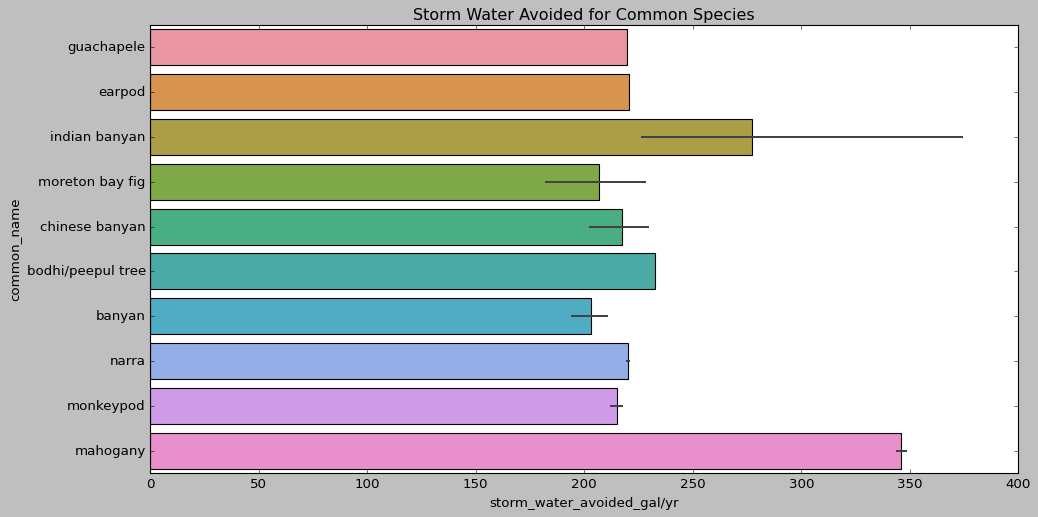

In [39]:
plt.figure(figsize=[14,7])
sns.barplot(data=common_types_df, x="storm_water_avoided_gal/yr", 
                y="common_name")
plt.title("Storm Water Avoided for Common Species")

Text(0.5, 1.0, 'Storm Water Intercepted for Common Species')

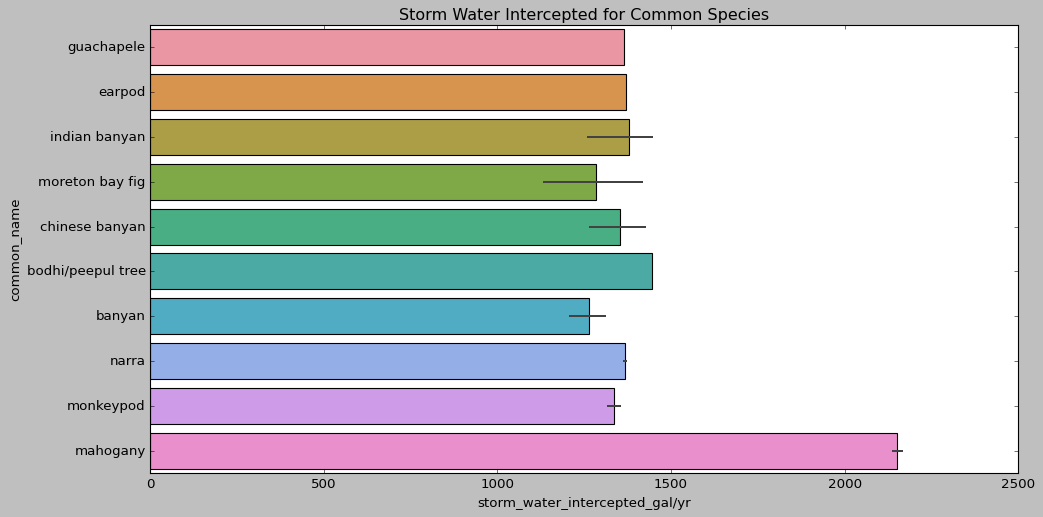

In [40]:
plt.figure(figsize=[14,7])
sns.barplot(data=common_types_df, x="storm_water_intercepted_gal/yr", 
                y="common_name")
plt.title("Storm Water Intercepted for Common Species")

<AxesSubplot: title={'center': 'Condition of the Top 3 Most Common Types'}, xlabel='common_name', ylabel='count'>

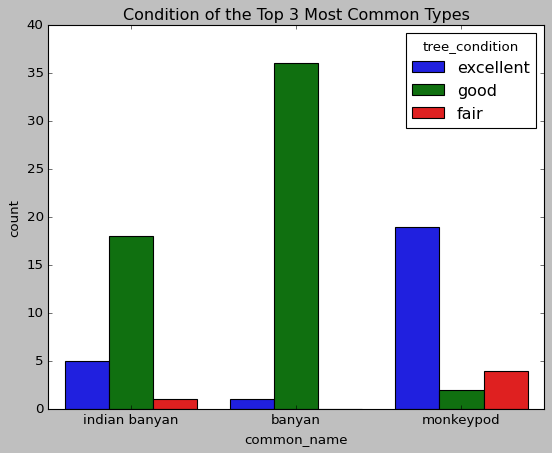

In [41]:
most_common = ["banyan", "indian banyan", "monkeypod"]
most_common_df = trees[trees["common_name"].isin(most_common)]
lesser_common_df = common_types_df[common_types_df["common_name"].isin(most_common) == False]

plt.title("Condition of the Top 3 Most Common Types")
sns.countplot(data=most_common_df, x = "common_name", hue="tree_condition", hue_order=["excellent", "good", "fair"])

Text(0.5, 1.0, 'Condition of the Most Common Types')

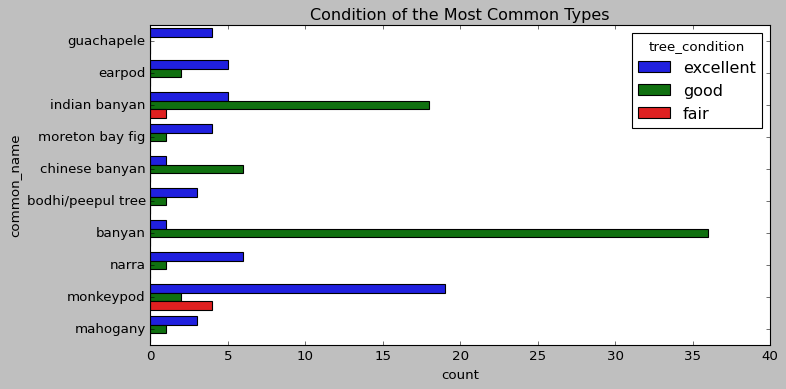

In [42]:
plt.figure(figsize=[10,5])
sns.countplot(data=common_types_df, y = "common_name", hue="tree_condition", hue_order=["excellent", "good", "fair"])
plt.title("Condition of the Most Common Types")

Text(0.5, 1.0, 'Tree Locations')

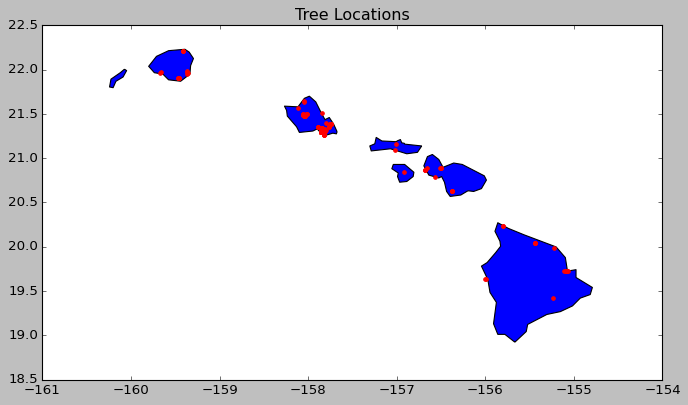

In [43]:
states = gpd.read_file("21basic/states.shp")
geometry = [Point(xy) for xy in zip(trees["longitude"], trees["latitude"])]
geotrees = gpd.GeoDataFrame(trees, geometry=geometry)

plt.style.use('classic')
geotrees.plot(ax=states[states.state_abbr == "HI"].plot(figsize=(10, 6)), 
              marker='o', color='red', markersize=10)
plt.title("Tree Locations")

Text(0.5, 1.0, 'Common Tree Locations')

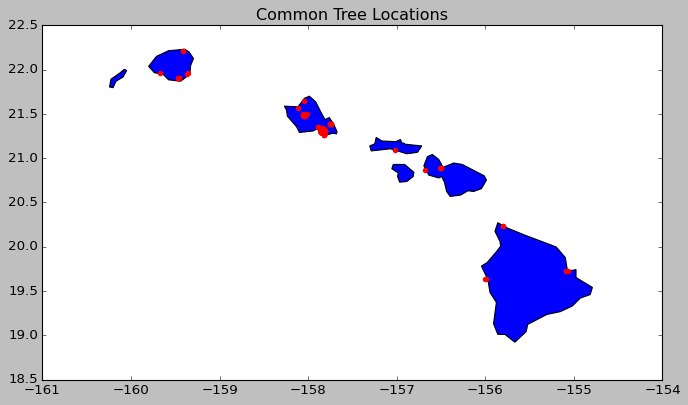

In [44]:
geometry2 = [Point(xy) for xy in zip(common_types_df["longitude"], common_types_df["latitude"])]
geocommon = gpd.GeoDataFrame(common_types_df, geometry=geometry2)

plt.style.use('classic')
geocommon.plot(ax=states[states.state_abbr == "HI"].plot(figsize=(10, 6)), 
              marker='o', color = "red", markersize=15)
plt.title("Common Tree Locations")

Text(0.5, 1.0, 'Top 3 Most Common Tree Locations')

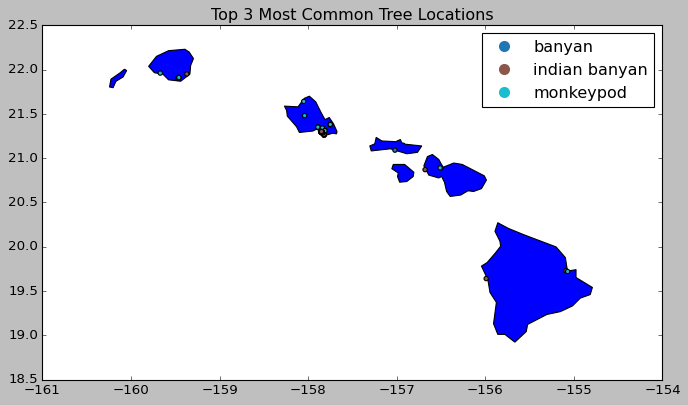

In [45]:
geometry3 = [Point(xy) for xy in zip(most_common_df["longitude"], most_common_df["latitude"])]
geotop3 = gpd.GeoDataFrame(most_common_df, geometry=geometry3)

plt.style.use('classic')
geotop3.plot(ax=states[states.state_abbr == "HI"].plot(figsize=(10, 6)), 
              marker='o', column = "common_name", markersize=15, legend = True)
plt.title("Top 3 Most Common Tree Locations")

Text(0.5, 1.0, 'Lesser Common Tree Locations')

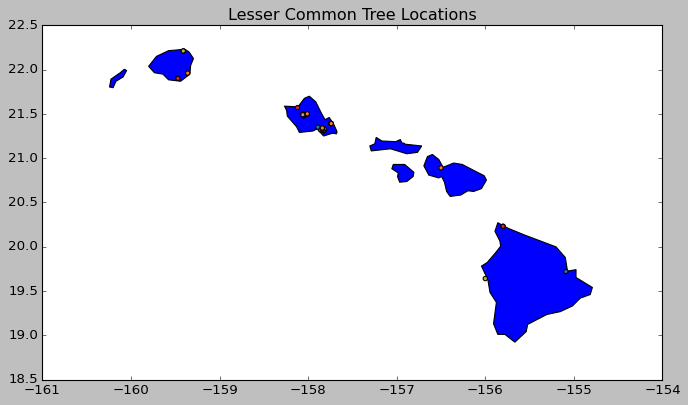

In [46]:
geometry4 = [Point(xy) for xy in zip(lesser_common_df["longitude"], lesser_common_df["latitude"])]
geolesser = gpd.GeoDataFrame(lesser_common_df, geometry=geometry4)

plt.style.use('classic')
geolesser.plot(ax=states[states.state_abbr == "HI"].plot(figsize=(10, 6)), 
              marker='o', column = "common_name", markersize=15)
plt.title("Lesser Common Tree Locations")

<AxesSubplot: xlabel='height_ft', ylabel='island'>

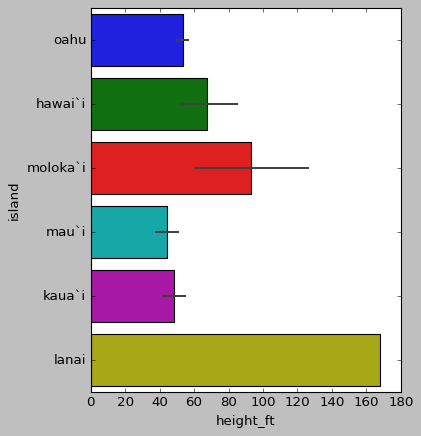

In [47]:
plt.figure(figsize=[5,6])
sns.barplot(data=trees, y="island", x="height_ft")

<AxesSubplot: xlabel='diameter_in', ylabel='island'>

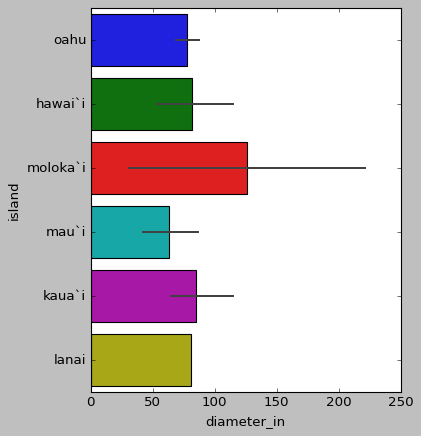

In [48]:
plt.figure(figsize=[5,6])
sns.barplot(data=trees, y="island", x="diameter_in")

<AxesSubplot: xlabel='count', ylabel='island'>

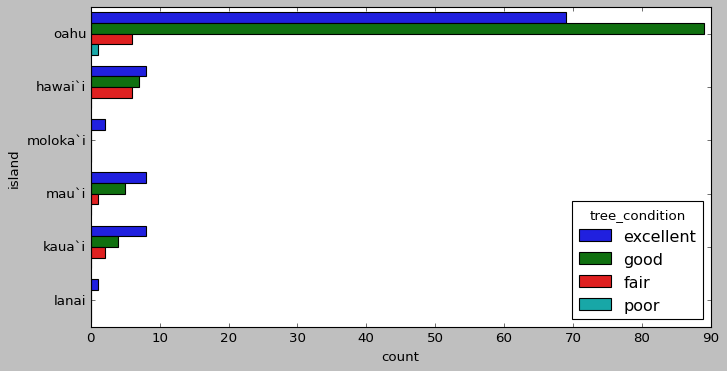

In [49]:
plt.figure(figsize=[10,5])
sns.countplot(data=trees, y="island", hue="tree_condition", 
              hue_order = ["excellent", "good", "fair", "poor"])